In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.linalg import eigh

In [2]:
# Read data files

auto_mpg = pd.read_csv(auto-mpg.csv")
auto_mpg.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
'''
There are 8 variables in the data:

mpg: miles per gallon    
cyl: number of cylinders    
disp: engine displacement (cu. inches) or engine size    
hp: horsepower    
wt: vehicle weight (lbs.)    
acc: time taken to accelerate from O to 60 mph (sec.)    
yr: model year    
car name: car model name
'''
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
# Print unique vallues 0f hp (horese power)
print(auto_mpg.hp.unique())

# As seen in unique values of horse power "?" is not consider as horse power. So replace "?" with np.nan value.
print("\nNumber of \"?\" is: " + str(auto_mpg[auto_mpg["hp"] == "?"]["hp"].count()))
auto_mpg["hp"] = auto_mpg["hp"].replace("?", np.nan)

# Now fill np.nan values with mean value.
auto_mpg.hp.fillna(auto_mpg.hp.median(), inplace=True)
auto_mpg['hp'] = auto_mpg['hp'].astype('int64')

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']

Number of "?" is: 6


In [5]:
# The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. 
# We can drop this column.
data1 = auto_mpg.copy()
data = auto_mpg.drop(['car name'], axis=1)
data.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.296482,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.224809,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(398, 8)


In [7]:
#find the co-variance matrix which is : A^T * A
sample = standardized_data

# matrix multiplication using numpy
covar = np.matmul(sample.T , sample)

print ( "The shape of variance matrix = ", covar.shape)

The shape of variance matrix =  (8, 8)


In [8]:
# finding the top two eigen-values and corresponding eigen-vectors
# for projecting onto a 2-Dim space.

# the parameter 'eigvals' is defined (low value to heigh value)
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar, eigvals=(6,7))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

# projecting the original data sample on the plane
#formed by two principal eigen vectors by vector-vector multiplication.

newc= np.matmul(vectors, sample.T)

print ("Resultanat new data points' shape ", vectors.shape, "X", sample.T.shape," = ", newc.shape)

Shape of eigen vectors =  (8, 2)
Updated shape of eigen vectors =  (2, 8)
Resultanat new data points' shape  (2, 8) X (8, 398)  =  (2, 398)


In [9]:
# appending label to the 2d projected data
newc = np.vstack((newc, data1["car name"])).T

# creating a new data frame for ploting the labeled points.
df = pd.DataFrame(data=newc, columns=("1st_principal", "2nd_principal", "label"))
print(df.head())


  1st_principal 2nd_principal                      label
0      0.953822     -2.743429  chevrolet chevelle malibu
1       1.06378     -3.569943          buick skylark 320
2      1.172424     -3.061642         plymouth satellite
3      1.052116     -3.006943              amc rebel sst
4      1.244752     -2.996005                ford torino


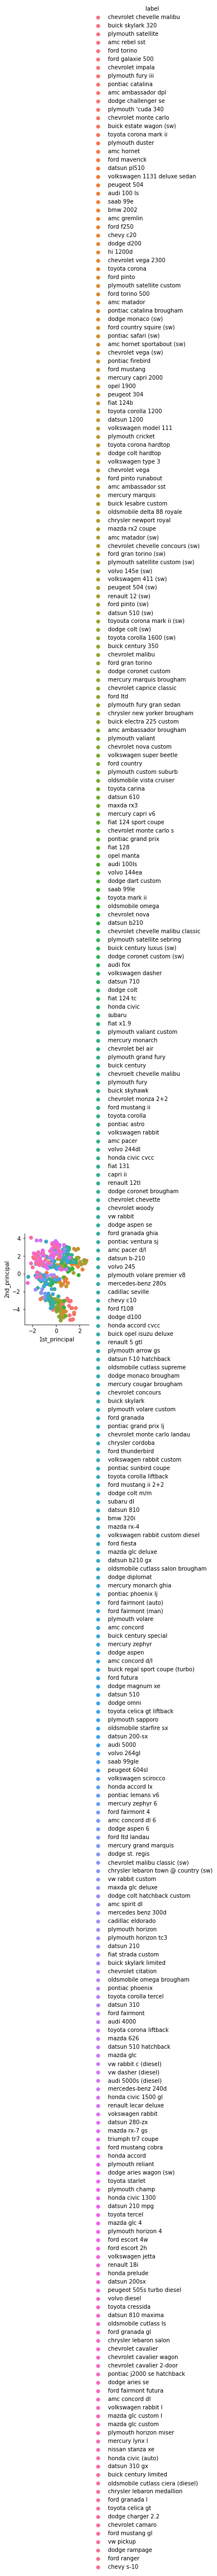

In [10]:
sns.FacetGrid(df, hue="label").map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA 

In [11]:
from sklearn import decomposition
pca = decomposition.PCA()

In [12]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (398, 2)


In [13]:
# attaching the label for each 2-d data point
pca_data = np.vstack((pca_data.T, data1["car name"])).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))

In [14]:
print(pca_df.columns)

# Here 8 columns are converted into 2 columns

Index(['1st_principal', '2nd_principal', 'label'], dtype='object')


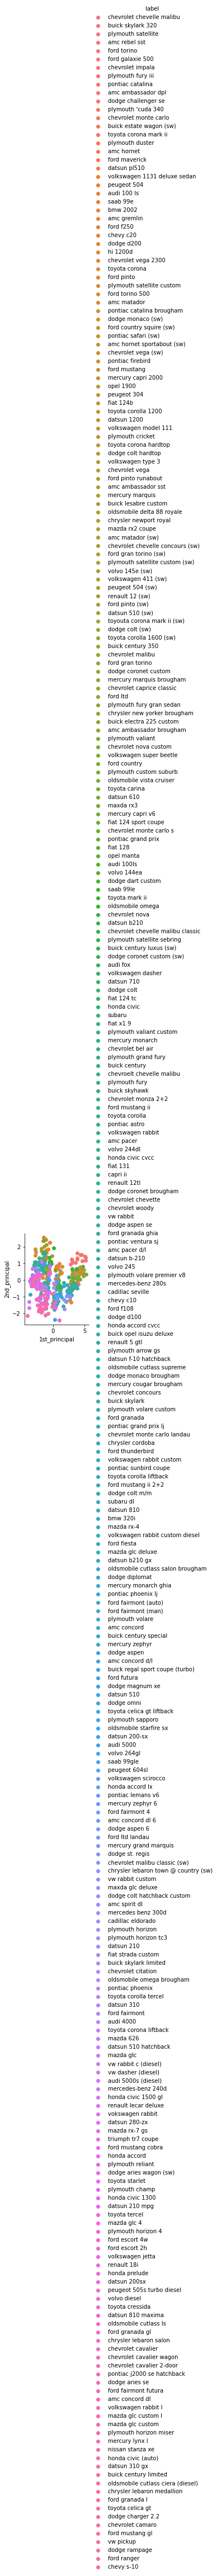

In [15]:
sns.FacetGrid(pca_df, hue="label").map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

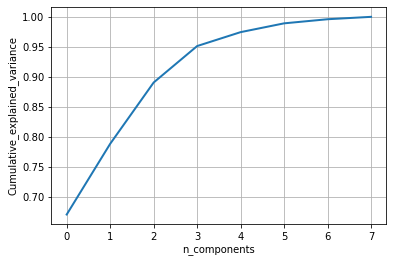

In [16]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 8
pca_data = pca.fit_transform(sample)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# If we take 200-dimensions, approx. 90% of variance is expalined.